In [1]:
import yfinance as yf

# Download historical stock data for a specific company (e.g., Apple - AAPL)
df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

# Display first few rows
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716049,72.776575,71.466790,71.720996,135480400
2020-01-03,72.009140,72.771768,71.783985,71.941351,146322800
2020-01-06,72.582924,72.621661,70.876090,71.127881,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [2]:
# Check for missing values
df.isnull().sum()


,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


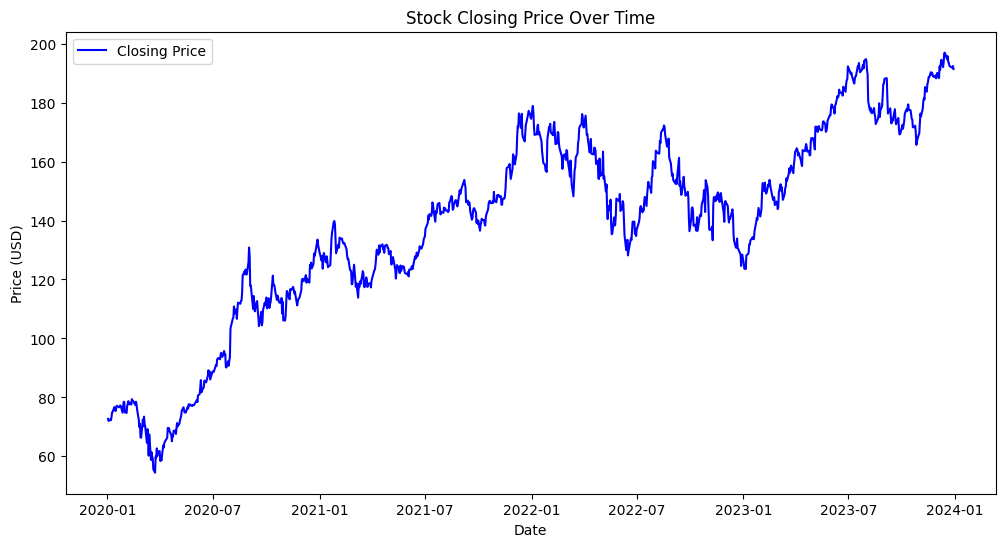

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


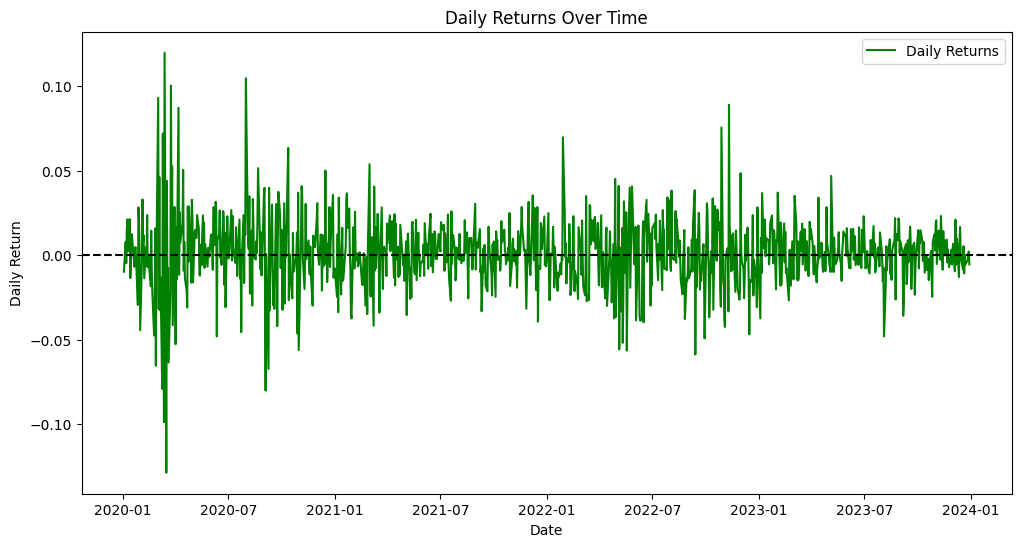

In [4]:
df["Daily Return"] = df["Close"].pct_change()

# Plot daily returns
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Daily Return"], color="green", label="Daily Returns")
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


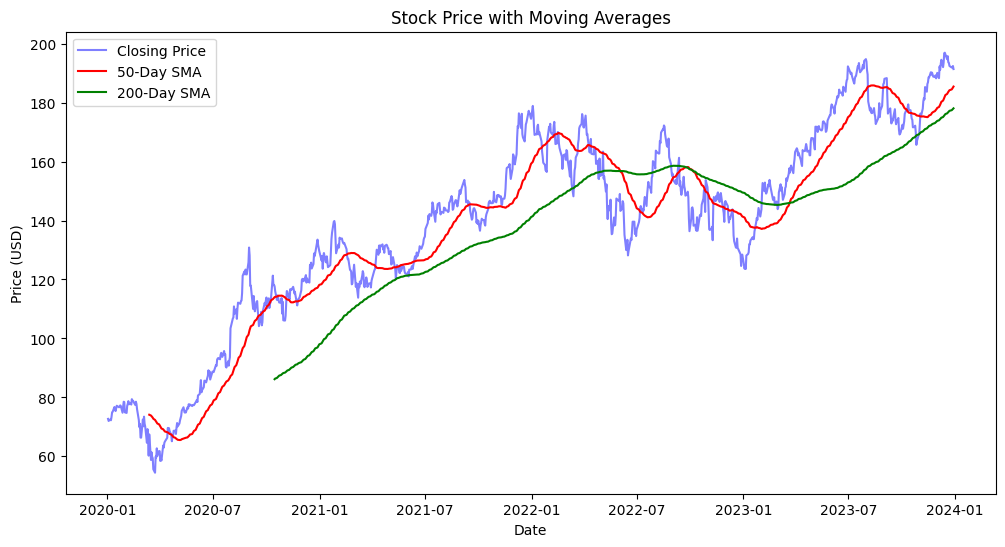

In [5]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()  # 50-day moving average
df["SMA_200"] = df["Close"].rolling(window=200).mean()  # 200-day moving average

# Plot moving averages
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(df.index, df["SMA_50"], label="50-Day SMA", color="red")
plt.plot(df.index, df["SMA_200"], label="200-Day SMA", color="green")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


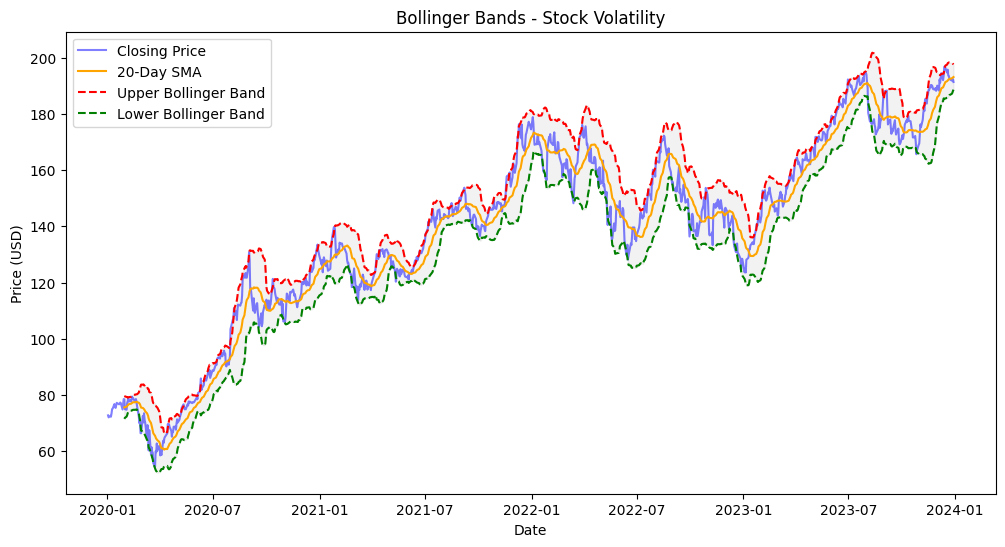

In [6]:
import numpy as np

# Calculate 20-day Moving Average
df["SMA_20"] = df["Close"].rolling(window=20).mean()

# Calculate Standard Deviation
df["STD_20"] = df["Close"].rolling(window=20).std()

# Calculate Upper & Lower Bollinger Bands
df["Upper_Band"] = df["SMA_20"] + (2 * df["STD_20"])
df["Lower_Band"] = df["SMA_20"] - (2 * df["STD_20"])

# Plot Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(df.index, df["SMA_20"], label="20-Day SMA", color="orange")
plt.plot(df.index, df["Upper_Band"], label="Upper Bollinger Band", color="red", linestyle="dashed")
plt.plot(df.index, df["Lower_Band"], label="Lower Bollinger Band", color="green", linestyle="dashed")
plt.fill_between(df.index, df["Lower_Band"], df["Upper_Band"], color='gray', alpha=0.1)
plt.title("Bollinger Bands - Stock Volatility")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


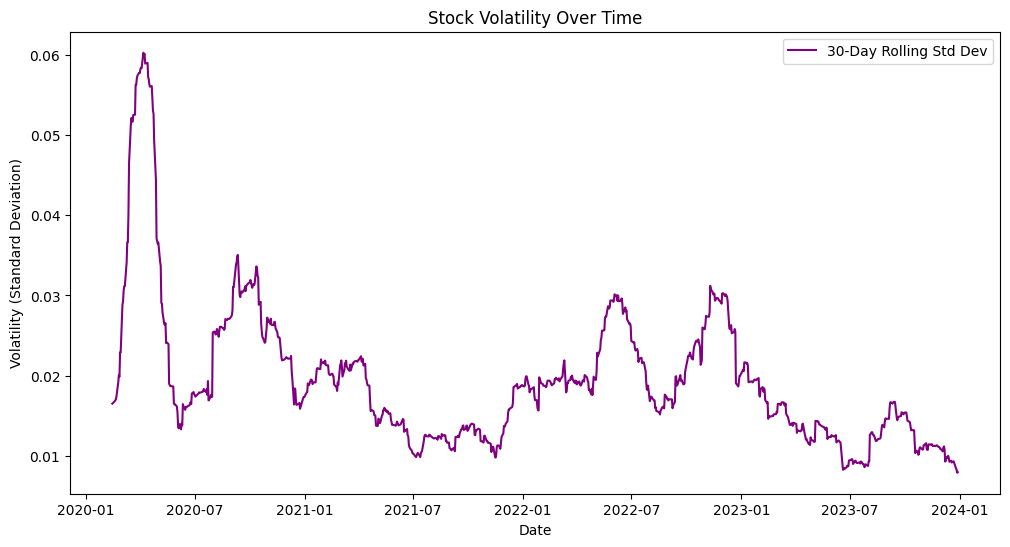

In [7]:
# Compute 30-day Rolling Standard Deviation
df["Rolling_STD"] = df["Daily Return"].rolling(window=30).std()

# Plot Rolling Volatility
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Rolling_STD"], color="purple", label="30-Day Rolling Std Dev")
plt.title("Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.show()


In [8]:
import yfinance as yf

# Define stock symbols
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN"]

# Download stock data
df_stocks = yf.download(stocks, start="2020-01-01", end="2024-01-01")["Close"]

# Display first few rows
df_stocks.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-01-02,72.716049,94.900497,68.108376,153.323242
2020-01-03,72.009140,93.748497,67.752075,151.414108
2020-01-06,72.582924,95.143997,69.557945,151.805527
2020-01-07,72.241531,95.343002,69.423592,150.421326
2020-01-08,73.403641,94.598503,69.917732,152.817368


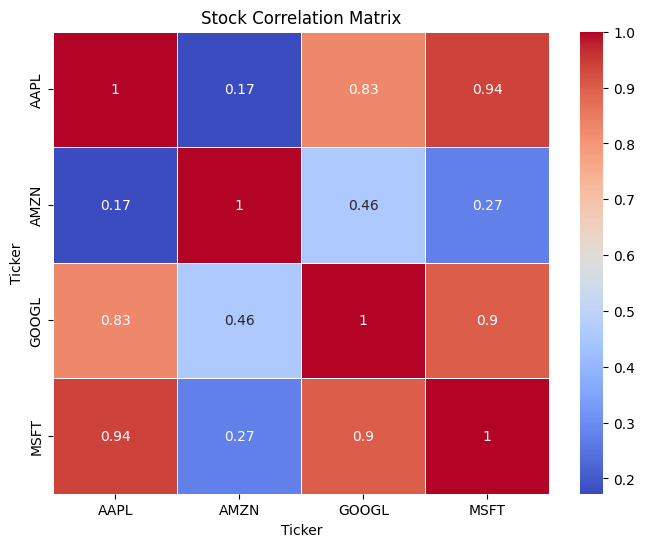

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_stocks.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Correlation Matrix")
plt.show()


[*********************100%***********************]  1 of 1 completed


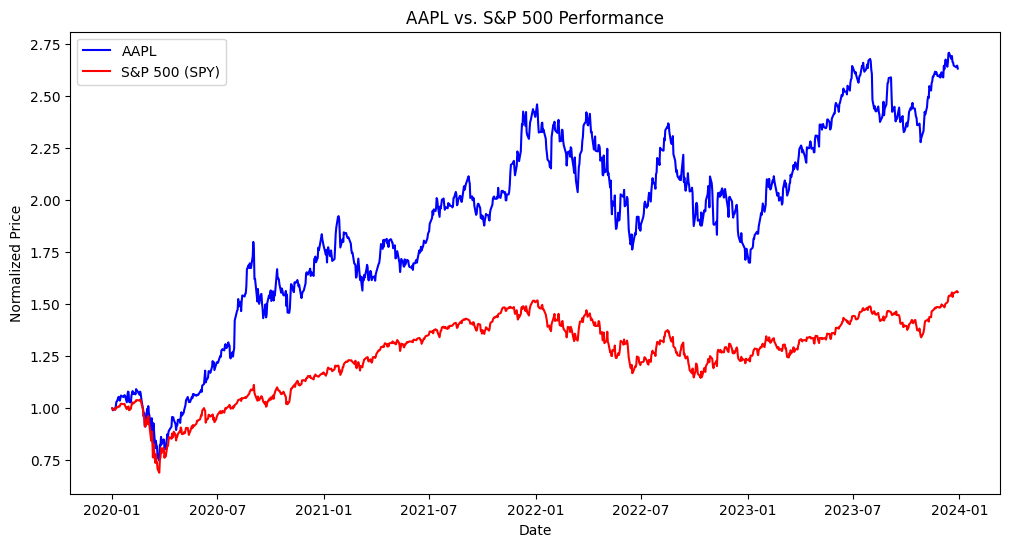

In [10]:
# Fetch S&P 500 data
df_spy = yf.download("SPY", start="2020-01-01", end="2024-01-01")["Close"]

# Normalize prices for comparison
df_stocks["AAPL_Norm"] = df_stocks["AAPL"] / df_stocks["AAPL"].iloc[0]
df_spy_norm = df_spy / df_spy.iloc[0]

# Plot Apple vs. S&P 500
plt.figure(figsize=(12,6))
plt.plot(df_stocks.index, df_stocks["AAPL_Norm"], label="AAPL", color="blue")
plt.plot(df_spy.index, df_spy_norm, label="S&P 500 (SPY)", color="red")
plt.title("AAPL vs. S&P 500 Performance")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Select important columns
df_ml = df[["Close"]].copy()

# Create lag features (Previous day's closing price)
df_ml["Close_Lag_1"] = df_ml["Close"].shift(1)
df_ml["Close_Lag_2"] = df_ml["Close"].shift(2)

# Create moving averages
df_ml["SMA_10"] = df_ml["Close"].rolling(window=10).mean()
df_ml["SMA_50"] = df_ml["Close"].rolling(window=50).mean()

# Drop NaN values created due to shifting
df_ml.dropna(inplace=True)

# Display first few rows
df_ml.head()


Price,Close,Close_Lag_1,Close_Lag_2,SMA_10,SMA_50
Ticker,AAPL,,,,
Date,,,,,
2020-03-13,67.457489,60.240211,66.841080,68.580121,74.122979
2020-03-16,58.779285,67.457489,60.240211,67.206557,73.844244
2020-03-17,61.363819,58.779285,67.457489,66.321750,73.631337
2020-03-18,59.861641,61.363819,58.779285,64.961050,73.376911
2020-03-19,59.402962,59.861641,61.363819,63.792790,73.120140


In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_ml.drop(columns=["Close"])  # Features
y = df_ml["Close"]  # Target variable

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print dataset shapes
X_train.shape, X_test.shape


<ipython-input-12-691158affcc6>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_ml.drop(columns=["Close"])  # Features


((765, 4), (192, 4))

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 8.89


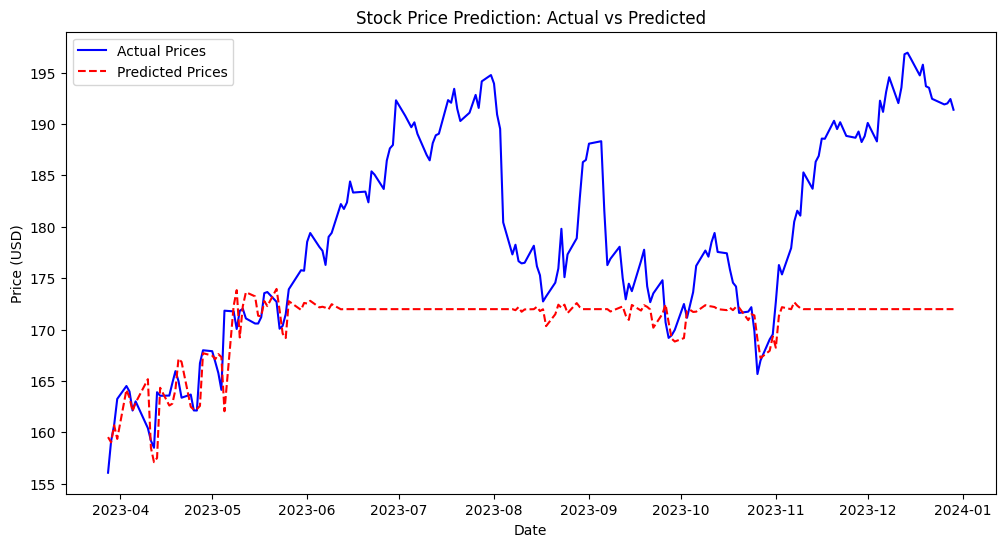

In [18]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [15]:
df_ml["Close_Lag_3"] = df_ml["Close"].shift(3)
df_ml["Close_Lag_5"] = df_ml["Close"].shift(5)
df_ml["Volatility"] = df_ml["Close"].rolling(window=10).std()
df_ml["Volume"] = df["Volume"]  # If available
df_ml.dropna(inplace=True)


In [16]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Absolute Error: {mae_xgb:.2f}")


XGBoost Mean Absolute Error: 11.03


In [17]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42)
